## Breast Cancer Facts of Ecuador

- Coder: Lenin G. Falconí
- email: 
    - lenin.falconi@epn.edu.ec
    - lenin.g.falconi@gmail.com

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

inc_mort_dataset_path = os.path.join(os.getcwd(), 'dataset-asr-inc-and-mort-both-sexes-in-2022-ecuador.csv')
inc_mort_df  = pd.read_csv(inc_mort_dataset_path)
inc_mort_df.shape

(88, 10)

In [3]:
inc_mort_df.columns

Index(['Label', 'Cancer code', 'Country code (ISO/UN)', 'Alpha‑3 code', 'Sex',
       'Type', 'ASR (World)', 'Crude rate', 'Cumulative risk', 'Total'],
      dtype='object')

In [4]:
inc_mort_df.head(10)

,Label,Cancer code,Country code (ISO/UN),Alpha‑3 code,Sex,Type,ASR (World),Crude rate,Cumulative risk,Total
0,"Lip, oral cavity",1,218,N.A.,0,0,1.20,1.35,NaN,244
1,"Lip, oral cavity",1,218,N.A.,0,1,0.51,0.61,NaN,110
2,Salivary glands,2,218,N.A.,0,0,0.39,0.46,NaN,84
3,Salivary glands,2,218,N.A.,0,1,0.13,0.17,NaN,30
4,Oropharynx,3,218,N.A.,0,0,0.44,0.47,NaN,86
5,Oropharynx,3,218,N.A.,0,1,0.19,0.22,NaN,39
6,Nasopharynx,4,218,N.A.,0,0,0.16,0.18,NaN,33
7,Nasopharynx,4,218,N.A.,0,1,0.08,0.09,NaN,17
8,Hypopharynx,5,218,N.A.,0,0,0.08,0.09,NaN,17
9,Hypopharynx,5,218,N.A.,0,1,0.03,0.04,NaN,7


In [5]:
inc_mort_df[inc_mort_df.Label.isna()]

,Label,Cancer code,Country code (ISO/UN),Alpha‑3 code,Sex,Type,ASR (World),Crude rate,Cumulative risk,Total
70,NaN,20,218,NaN,1,0,0.0,0.0,0.0,0
71,NaN,21,218,NaN,1,0,0.0,0.0,0.0,0
72,NaN,22,218,NaN,1,0,0.0,0.0,0.0,0
73,NaN,23,218,NaN,1,0,0.0,0.0,0.0,0
74,NaN,24,218,NaN,1,0,0.0,0.0,0.0,0
75,NaN,25,218,NaN,1,0,0.0,0.0,0.0,0
76,NaN,26,218,NaN,2,0,0.0,0.0,0.0,0
77,NaN,27,218,NaN,2,0,0.0,0.0,0.0,0
78,NaN,28,218,NaN,2,0,0.0,0.0,0.0,0
79,NaN,20,218,NaN,1,1,0.0,0.0,0.0,0


It is to be noticed that csv from globocan has NaN values in Label because it is defined the type of cancer by Cancer Code. So Nan Values could be replaced with proper names from the dictionary obtained. Also it seems that sex has 3 values 0, 1, and 2. 0 seems both sexes and 1 and 2 must be for female and male

In [6]:
inc_mort_df = inc_mort_df[-inc_mort_df.Label.isna()]
inc_mort_df.shape

(70, 10)

In [7]:
cancer_codes_dict = dict(zip(inc_mort_df['Cancer code'], inc_mort_df['Label']))
cancer_codes_dict.items()

dict_items([(1, 'Lip, oral cavity'), (2, 'Salivary glands'), (3, 'Oropharynx'), (4, 'Nasopharynx'), (5, 'Hypopharynx'), (6, 'Oesophagus'), (7, 'Stomach'), (41, 'Colorectum'), (11, 'Liver and intrahepatic bile ducts'), (12, 'Gallbladder'), (13, 'Pancreas'), (14, 'Larynx'), (15, 'Trachea, bronchus and lung'), (16, 'Melanoma of skin'), (18, 'Mesothelioma'), (19, 'Kaposi sarcoma'), (20, 'Breast'), (21, 'Vulva'), (22, 'Vagina'), (23, 'Cervix uteri'), (24, 'Corpus uteri'), (25, 'Ovary'), (26, 'Penis'), (27, 'Prostate'), (28, 'Testis'), (29, 'Kidney'), (30, 'Bladder'), (31, ' Brain, central nervous system'), (32, 'Thyroid'), (33, 'Hodgkin lymphoma'), (34, 'Non-Hodgkin lymphoma'), (35, 'Multiple myeloma'), (36, 'Leukaemia'), (37, 'Other specified cancers'), (38, 'Unspecified sites')])

In [8]:
inc_mort_df.Sex.value_counts()

Sex
0    70
Name: count, dtype: int64

In [9]:
# Split the DataFrame into odd and even rows
incidence_df = inc_mort_df.iloc[::2].reset_index(drop=True) # Odd rows (0, 2, 4, ...) 
mortality_df = inc_mort_df.iloc[1::2].reset_index(drop=True) # Even rows (1, 3, 5, ...)
incidence_df.shape, mortality_df.shape

((35, 10), (35, 10))

In [11]:
os.getcwd()

'd:\\entea\\talks\\EncuentroDoctorantesInvestigadores2024\\images\\breast-cancer'

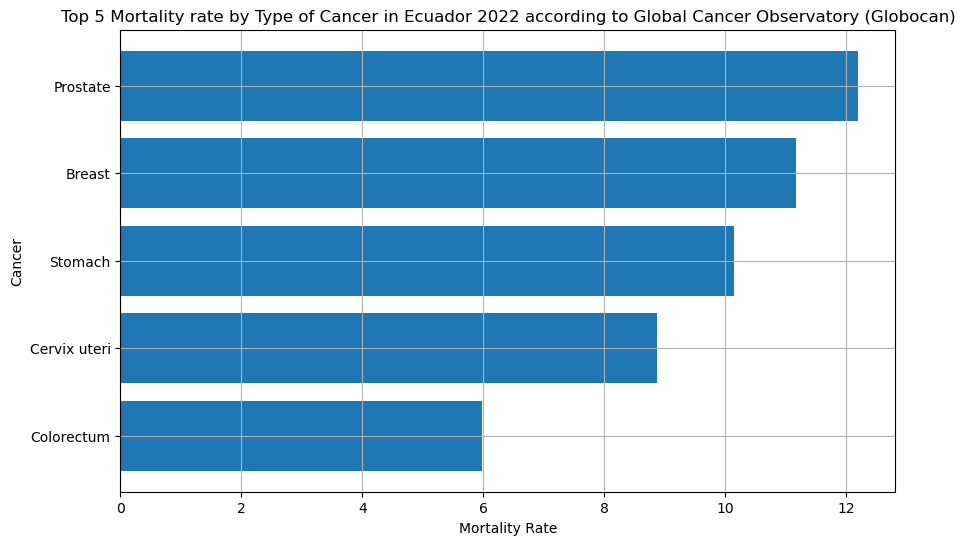

: 

In [ ]:
# Sort the mortality DataFrame by ASR values in descending order and select top 5
top_5_mortality = mortality_df.sort_values(by='ASR (World)', ascending=False).head(5)
# mortality_df[['Label', 'ASR (World)']].sort_values(by='ASR (World)', ascending=False).head(5).plot.barh()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_5_mortality['Label'], top_5_mortality['ASR (World)'])
plt.xlabel('Mortality Rate')
plt.ylabel('Cancer')
plt.title('Top 5 Mortality rate by Type of Cancer in Ecuador 2022 according to Global Cancer Observatory (Globocan)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.grid()
# save fig
plt.savefig('mortality-ec.png')
plt.show()

